# Drzewa Klasyfikacyjne (Classification Trees)

Drzewa klasyfikacyjne są strukturą danych stosowaną w uczeniu maszynowym, która modeluje decyzje lub klasyfikacje za pomocą sekwencji pytań lub testów.

Formalnie, drzewo klasyfikacyjne $T$ jest funkcją $T: X \rightarrow Y$, gdzie $X$ jest przestrzenią wejściową (np. wektory cech) a $Y$ jest przestrzenią wyjściową (np. etykiety klas).

## Definicja

Drzewo klasyfikacyjne można zdefiniować jako strukturę drzewiastą, gdzie:

- Każdy węzeł wewnętrzny w drzewie reprezentuje test na jednym z atrybutów wejściowych, np. $x_i < \theta$.
- Każda krawędź od węzła do jego dziecka reprezentuje wynik testu.
- Każdy liść reprezentuje etykietę klasy (dla drzew klasyfikacyjnych) lub wartość rzeczywistą (dla drzew regresji).

## Algorytm Budowy Drzewa

Poniżej jest opisany algorytm budowy drzewa klasyfikacyjnego, tzw. algorytm ID3:

1. Jeżeli wszystkie przykłady w bieżącym zbiorze danych mają tę samą etykietę klasy, stwórz liść z tą etykietą i zakończ.
2. W przeciwnym razie, dla każdego atrybutu $a$ oblicz miarę jakości podziału, np. zysk informacyjny.
3. Wybierz atrybut z największym zyskiem informacyjnym.
4. Stwórz nowy węzeł decyzyjny dla tego atrybutu.
5. Podziel bieżący zbiór danych na podzbiory, używając wartości atrybutu z nowego węzła.
6. Dla każdego podzbioru, powtórz proces (rekurencyjnie), tworząc nowe gałęzie drzewa.

## Miary Jakości Podziału

Istnieje wiele miar jakości podziału. Dwie najpopularniejsze to zysk informacyjny i indeks Gini.

### Zysk Informacyjny

Zysk informacyjny $IG$ dla danego atrybutu $a$ i zbioru danych $D$ definiowany jest jako:

$$ IG(D, a) = H(D) - \sum_{v \in Values(a)} \frac{|D_v|}{|D|} H(D_v) $$

gdzie:
- $H(D)$ to entropia zbioru danych $D$,
- $Values(a)$ to zbiór wszystkich możliwych wartości atrybutu $a$,
- $D_v$ to podzbiór $D$ dla którego atrybut $a$ ma wartość $v$,
- $|D|$ to liczba przykładów w zbiorze $D$,
- $|D_v|$ to liczba przykładów w zbiorze $D_v$.

### Indeks Gini

Indeks Gini $Gini(D)$ dla zbioru danych $D$ definiowany jest jako:

$$ Gini(D) = 1 - \sum_{k=1}^{K} p_k^2 $$

gdzie:
- $K$ to liczba klas,
- $p_k$ to proporcja przykładów klasy $k$ w zbiorze $D$.

Indeks Gini dla podziału na podstawie atrybutu $a$ oblicza się jako ważoną średnią indeksów Gini dla podzbiorów:

$$ Gini(D, a) = \sum_{v \in Values(a)} \frac{|D_v|}{|D|} Gini(D_v) $$

### Przykładowe drzewa klasyfikacyjne

![Classification Tree](https://www.solver.com/sites/default/files/ctree.gif "Classification Tree")
![Classification Tree](https://www.researchgate.net/profile/Loren-Roth/publication/227267151/figure/fig2/AS:671517780217856@1537113723021/Standard-classification-tree-A-and-iterative-classification-tree-A-and-B-models-C.png "Classification Tree")
![Classification Tree](https://www.researchgate.net/profile/Maggi-Kelly/publication/216637957/figure/fig2/AS:667653916065802@1536192506491/Classification-tree-model-of-disease-risk-Ovals-and-squares-represent-non-terminal-and.ppm "Classification Tree")

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4908]:
df = pd.read_csv("./data/loans.csv")

In [4909]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4910]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4911]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4912]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4913]:
df.value_counts("Loan_Status")


Loan_Status
Y    422
N    192
dtype: int64

In [4914]:
df = df.dropna()

In [4915]:
df.Loan_Status = df.Loan_Status.map({'Y': 1,'N': 0})
df.Gender=df.Gender.map({'Male': 1,'Female': 0})
df.Married=df.Married.map({'Yes': 1,'No': 0})
df.Dependents=df.Dependents.map({'0': 0,'1': 1,'2': 2,'3+': 3})
df.Education=df.Education.map({'Graduate': 1,'Not Graduate': 0})
df.Self_Employed=df.Self_Employed.map({'Yes': 1,'No': 0})
df.Property_Area=df.Property_Area.map({'Urban': 2,'Rural': 0,'Semiurban': 1})

C:\Users\karmi\AppData\Local\Temp\ipykernel_9000\2343790270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Loan_Status = df.Loan_Status.map({'Y': 1,'N': 0})
C:\Users\karmi\AppData\Local\Temp\ipykernel_9000\2343790270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Gender=df.Gender.map({'Male': 1,'Female': 0})
C:\Users\karmi\AppData\Local\Temp\ipykernel_9000\2343790270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [4916]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [4917]:
df = df.drop("Loan_ID", 1)
y = df["Loan_Status"]
X = df.drop("Loan_Status", 1)

C:\Users\karmi\AppData\Local\Temp\ipykernel_9000\2843887193.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("Loan_ID", 1)
C:\Users\karmi\AppData\Local\Temp\ipykernel_9000\2843887193.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("Loan_Status", 1)


In [4918]:
df.value_counts("Loan_Status")

Loan_Status
1    332
0    148
dtype: int64

In [4919]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4920]:
"""
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier()
#
# Create grid parameters for hyperparameter tuning
#
params =  {
    'min_samples_leaf': list(range(1, 50, 3)),
    'max_depth': list(range(5, 200, 10)),
    'min_samples_split':list(range(2, 25, 2))
}
#
# Create gridsearch instance
#
grid = GridSearchCV(estimator=clf,
                    param_grid=params,
                    cv=10,
                    n_jobs=1,
                    verbose=2,
                    scoring="f1")

grid.fit(X_train, y_train)

max_depth, min_samples_leaf, min_samples_split = grid.best_params_['max_depth'], grid.best_params_['min_samples_leaf'], grid.best_params_['min_samples_split']
"""


'\nfrom sklearn.model_selection import GridSearchCV\nclf = DecisionTreeClassifier()\n#\n# Create grid parameters for hyperparameter tuning\n#\nparams =  {\n    \'min_samples_leaf\': list(range(1, 50, 3)),\n    \'max_depth\': list(range(5, 200, 10)),\n    \'min_samples_split\':list(range(2, 25, 2))\n}\n#\n# Create gridsearch instance\n#\ngrid = GridSearchCV(estimator=clf,\n                    param_grid=params,\n                    cv=10,\n                    n_jobs=1,\n                    verbose=2,\n                    scoring="f1")\n\ngrid.fit(X_train, y_train)\n\nmax_depth, min_samples_leaf, min_samples_split = grid.best_params_[\'max_depth\'], grid.best_params_[\'min_samples_leaf\'], grid.best_params_[\'min_samples_split\']\n'

In [4921]:
'''
print(f"""max_depth = {max_depth}
min_samples_leaf = {min_samples_leaf}
min_samples_split = {min_samples_split}
""")
'''


'\nprint(f"""max_depth = {max_depth}\nmin_samples_leaf = {min_samples_leaf}\nmin_samples_split = {min_samples_split}\n""")\n'

In [4922]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=15, min_samples_split=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=15, min_samples_split=5)

In [4923]:
pred = clf.predict(X_test)

<AxesSubplot:>

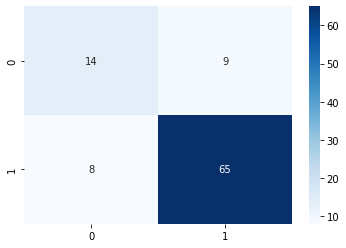

In [4924]:
confusion_matrix = confusion_matrix(y_test, pred)
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

In [4925]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.64      0.61      0.62        23
           1       0.88      0.89      0.88        73

    accuracy                           0.82        96
   macro avg       0.76      0.75      0.75        96
weighted avg       0.82      0.82      0.82        96

